In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [122]:
df = pd.read_csv('clean_data.csv')
df['year']

0       1998
1       1999
2       2000
3       2001
4       2002
        ... 
1087    2014
1088    2015
1089    2016
1090    2017
1091    2018
Name: year, Length: 1092, dtype: int64

In [132]:
dummy_df= pd.get_dummies(df, columns=['year'])
dummy_df

,country_name,country_code,conflict_frequency_code,conflict_deaths_code,population_density,population_growth_annual_per,total_population,refugee_pop_origin,rural_population,rural_population_per,...,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,Algeria,DZA,4,4.0,12.68,1.50,30192754.0,5727,12586453.0,41.69,...,0,0,0,0,0,0,0,0,0,0
1,Algeria,DZA,4,4.0,12.86,1.42,30623406.0,7151,12519461.0,40.88,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,DZA,4,4.0,13.03,1.36,31042235.0,8034,12442038.0,40.08,...,0,0,0,0,0,0,0,0,0,0
3,Algeria,DZA,4,4.0,13.21,1.31,31451514.0,8418,12356671.0,39.29,...,0,0,0,0,0,0,0,0,0,0
4,Algeria,DZA,4,4.0,13.37,1.28,31855109.0,12107,12263898.0,38.50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Zimbabwe,ZWE,4,4.0,35.12,1.75,13586681.0,22492,9170466.0,67.50,...,0,0,0,0,0,1,0,0,0,0
1088,Zimbabwe,ZWE,4,4.0,35.71,1.66,13814629.0,21344,9340761.0,67.62,...,0,0,0,0,0,0,1,0,0,0
1089,Zimbabwe,ZWE,4,4.0,36.27,1.55,14030390.0,18156,9499135.0,67.70,...,0,0,0,0,0,0,0,1,0,0
1090,Zimbabwe,ZWE,4,4.0,36.80,1.46,14236745.0,17390,9647246.0,67.76,...,0,0,0,0,0,0,0,0,1,0


In [148]:
X = dummy_df[['population_density', 'year_2018',
        'population_growth_annual_per','total_population',
       'rural_population','rural_population_per','rural_population_growth','urban_population',
        'corruption_control_estimate','stability_est',
      # 'corruption_control_percentile','urban_population_per','urban_population_growth', 
       # 'government_effectiveness_percentile','stability_percentile','regulatory_percentile','ruleoflaw_percentile',
        #  'regulatory_est', 'government _effectiveness_est',  
        'ruleoflaw_est','accountability_est','ethnic_score',
        'gdp_growth_per','gdp_percap_per','mortality_rate','gdp_total','gdp_percap','gni_total',
        'fdi_inflows_gdp','fdi_inflows_total']]

y = dummy_df["conflict_events"]

X= sm.add_constant(X)
np.asarray(X)

array([[1.00000000e+00, 1.26800000e+01, 0.00000000e+00, ...,
        4.61877476e+10, 1.26000000e+00, 6.06600000e+08],
       [1.00000000e+00, 1.28600000e+01, 0.00000000e+00, ...,
        4.63506104e+10, 6.00000000e-01, 2.91600000e+08],
       [1.00000000e+00, 1.30300000e+01, 0.00000000e+00, ...,
        5.20787324e+10, 5.10000000e-01, 2.80100000e+08],
       ...,
       [1.00000000e+00, 3.62700000e+01, 0.00000000e+00, ...,
        1.87729523e+10, 1.67000000e+00, 3.43013813e+08],
       [1.00000000e+00, 3.68000000e+01, 0.00000000e+00, ...,
        2.00795968e+10, 1.12000000e+00, 2.47187739e+08],
       [1.00000000e+00, 3.73000000e+01, 1.00000000e+00, ...,
        2.27066484e+10, 3.06000000e+00, 7.44637199e+08]])

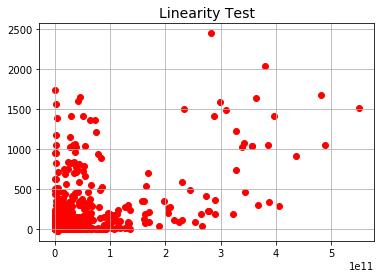

In [149]:
#Running linearity tests for Independent Variables
x_plot = df['gni_total']
y_plot= df['conflict_events']

plt.scatter(x_plot, y_plot, color = 'red')
plt.title('Linearity Test', fontsize=14)

plt.grid(True)
plt.show()

In [150]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        conflict_events   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     44.15
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          5.61e-129
Time:                        09:31:26   Log-Likelihood:                -7354.2
No. Observations:                1092   AIC:                         1.475e+04
Df Residuals:                    1070   BIC:                         1.486e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           34.7383     45.467      0.764      0.445     -54.476     123.953
population_density               0.0656      0.066      0.989      0.323      -0.065       0.196
year_2018                      116.4311     29.789      3.909      0.000      57.979     174.883
population_growth_annual_per    -1.2294     11.019     -0.112      0.911     -22.850      20.391
total_population                 0.0027      0.002      1.195      0.232      -0.002       0.007
rural_population                -0.0027      0.002     -1.195      0.232      -0.007       0.002
rural_population_per             0.3188      0.655      0.487      0.626      -0.966       1.603
rural_population_growth         -9.7464     10.532     -0.925      0.355     -30.411      10.918
urban_population                -0.0027      0.002     -1.194      0.233      -0.007       0.002
corruption_control_estimate    -38.8628     23.526     -1.652      0.099     -85.026       7.300
stability_est                 -133.8632     11.493    -11.647      0.000    -156.415    -111.311
ruleoflaw_est                   25.0655     27.199      0.922      0.357     -28.304      78.435
accountability_est              19.5298     13.722      1.423      0.155      -7.395      46.455
ethnic_score                     2.9276     30.484      0.096      0.924     -56.888      62.743
gdp_growth_per                  -2.2549      1.893     -1.191      0.234      -5.969       1.459
gdp_percap_per                  -0.9816      1.627     -0.603      0.546      -4.174       2.211
mortality_rate                  -0.9715      0.324     -2.994      0.003      -1.608      -0.335
gdp_total                    -3.386e-09   1.98e-09     -1.706      0.088   -7.28e-09    5.09e-10
gdp_percap                       0.0048      0.003      1.660      0.097      -0.001       0.010
gni_total                     5.235e-09   2.02e-09      2.586      0.010    1.26e-09    9.21e-09
fdi_inflows_gdp                  2.1965      0.846      2.596      0.010       0.537       3.857
fdi_inflows_total             -2.33e-08   6.05e-09     -3.849      0.000   -3.52e-08   -1.14e-08
==============================================================================
Omnibus:                      721.338   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11468.133
Skew:                           2.815   Prob(JB):                         0.00
Kurtosis:                      17.844   Cond. No.                     7.97e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+11. This might indicate that there are
s

In [ ]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk 
from sklearn import linear_model


In [159]:
# here we have 2 input variables for multiple regression.
X = df[['corruption_control_estimate','ethnic_score']].astype(float) 
 # output variable (what we are trying to predict)
Y = df['conflict_events'].astype(float)

In [172]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 62.53648967830601
Coefficients: 
 [-99.05556793  -1.48572429]


In [176]:
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

#Label for Independent Var #1
label1 = tk.Label(root, text='Type Corruption Control Estimate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

#Label for Independent Var #2
label2 = tk.Label(root, text=' Type Ethnic Diversity Score: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global new_corruption_control #our 1st input variable
    new_corruption_control = float(entry1.get()) 
    
    global new_ethnic_score #our 2nd input variable
    new_ethnic_score = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Conflict Occurence: ', regr.predict([[new_corruption_control ,new_ethnic_score]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Conflict Status',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['corruption_control_estimate'].astype(float),df['conflict_events'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['conflict_events']) 
ax3.set_xlabel('Control of Corruption')
ax3.set_title('Corruption Control vs COnflict Events')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['ethnic_score'].astype(float),df['conflict_events'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['conflict_events']) 
ax4.set_xlabel('ethnic_score')
ax4.set_title('ethnic diversity vs conflict events')

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\cfing\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-176-09c8bc35c705>", line 30, in values
    new_corruption_control = float(entry1.get())
ValueError: could not convert string to float: 


3

5

7

8

KeyboardInterrupt: 